# Advanced Optimization of the Model

In [1]:
import phoebe 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

logger = phoebe.logger(clevel = 'WARNING')

In [2]:
b = phoebe.open('/Users/karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_estimators.bundle')

# Update Physics 

In [3]:
b.add_compute(compute = 'physics_comp')

<ParameterSet: 46 parameters | datasets: rv01, lc01, _default>

In [4]:
b.set_value_all('ld_mode', value = 'interp')
b.set_value_all('atm', value = 'ck2004')
b.set_value('irrad_method', compute = 'physics_comp', value = 'horvat')
b.set_value_all('rv_method', compute = 'physics_comp', value = 'flux-weighted')
b.set_value_all('distortion_method', compute = 'physics_comp', value = 'roche')

In [5]:
b['ntriangles@primary@physics_comp'] = 2000

### Fitting with Nelder Mead optimizer

In [6]:
b.add_solver('optimizer.nelder_mead', solver = 'nm_solver', compute = 'physics_comp')

<ParameterSet: 14 parameters | qualifiers: fit_parameters, priors, continue_from, priors_combine, use_server, comments, expose_lnprobabilities, fatol, progress_every_niters, maxiter, adaptive, xatol, initial_values, compute>

In [7]:
b.set_value('maxiter@nm_solver', value = 500)

In [8]:
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, primary, binary>

In [12]:
b.flip_constraint('esinw', solve_for = 'ecc')
b.flip_constraint('ecosw', solve_for = 'per0')

<ConstraintParameter: {per0@binary@component} = arctan2({esinw@binary@component}, {ecosw@binary@component}) (solar units) => 83.92496480061736 deg>

In [10]:
fit_params = ['incl@binary', 'teffratio@binary', 'requivsumfrac@binary', 'requivratio@binary', 'esinw@binary', 'ecosw@binary']
b.set_value('fit_parameters@nm_solver', fit_params)

In [14]:
b.run_solver('nm_solver', compute = 'physics_comp', solution = 'nm_lc_sol')

In [11]:
print(b.adopt_solution('nm_lc_sol', trial_run = True))

ParameterSet: 3 parameters
   teffratio@binary@orbit@comp...: 0.8305440646745308
   requivsumfrac@binary@orbit@...: 0.16426775169683577
   requivratio@binary@orbit@co...: 1.0436187456983392


In [12]:
b.adopt_solution('nm_lc_sol')

<ParameterSet: 8 parameters | kinds: orbit, star>

In [13]:
b.run_compute(compute = 'physics_comp', solution = 'nm_lc_sol', sample_num = 1, model = 'nm_lc_model')

Fri, 02 Aug 2024 01:02 BUNDLE       WARNING applying passed solution (nm_lc_sol) to sample_from
Fri, 02 Aug 2024 01:02 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:42<00:00, 42.18s/it]


<ParameterSet: 9 parameters | qualifiers: comments, flux_scale, times, samples, sampled_twigs, failed_samples, fluxes, sampled_uniqueids, sample_mode>

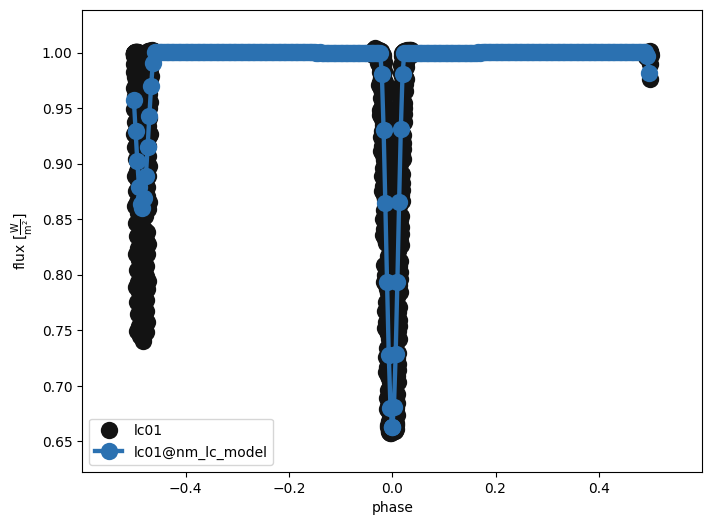

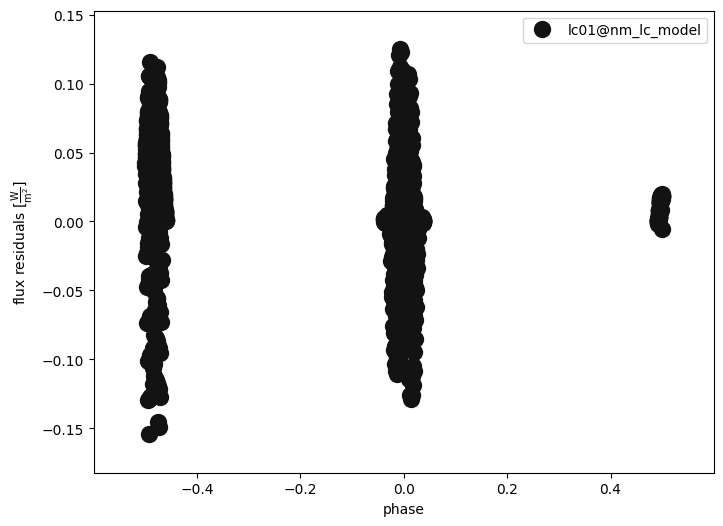

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [14]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [4]:
fit_params = ['teffratio@binary', 'incl@binary']
b.set_value('fit_parameters@nm_solver', fit_params)

In [5]:
b.set_value('compute_phases@lc01', value = phoebe.linspace(0, 1, 1001))

In [6]:
b.run_solver('nm_solver', compute = 'physics_comp', solution = 'nm_lc_sol', overwrite = True)

100%|██████████| 100/100 [2:07:21<00:00, 76.41s/it] 


<ParameterSet: 11 parameters | qualifiers: niter, success, adopt_distributions, fitted_values, fitted_units, fitted_twigs, adopt_values, message, adopt_parameters, initial_values, comments>

In [7]:
print(b.adopt_solution('nm_lc_sol', trial_run = True))

ParameterSet: 2 parameters
   teffratio@binary@orbit@comp...: 0.8305614635129406
      incl@binary@orbit@component: 85.73435900716616 deg


In [8]:
b.adopt_solution('nm_lc_sol')

<ParameterSet: 18 parameters | kinds: orbit, star>

In [9]:
b.run_compute(compute = 'physics_comp', solution = 'nm_lc_sol', sample_num = 1, model = 'nm_lc_model', overwrite = True)

Fri, 02 Aug 2024 14:12 BUNDLE       WARNING applying passed solution (nm_lc_sol) to sample_from
Fri, 02 Aug 2024 14:12 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:57<00:00, 177.38s/it]


<ParameterSet: 9 parameters | qualifiers: failed_samples, times, fluxes, sampled_uniqueids, sample_mode, sampled_twigs, samples, flux_scale, comments>

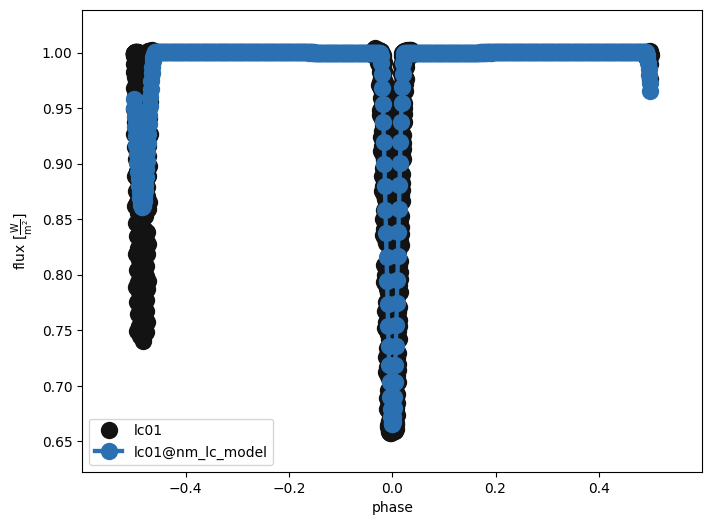

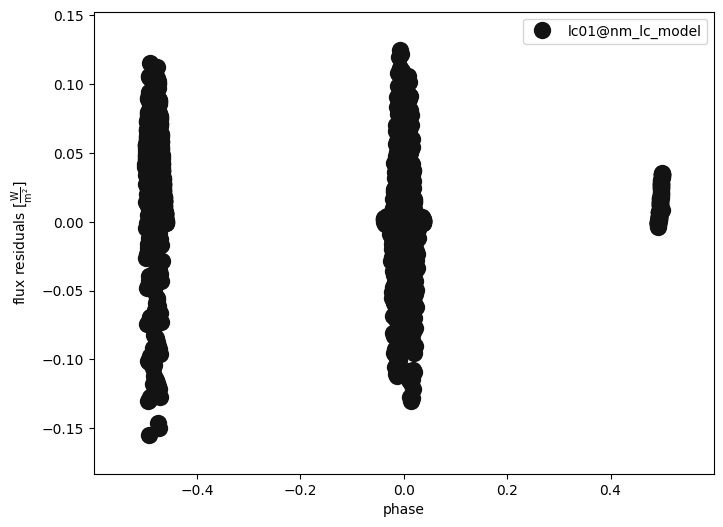

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [10]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [14]:
fit_params = ['teffratio@binary', 'requivratio@binary']
b.set_value('fit_parameters@nm_solver', fit_params)

In [15]:
b.run_solver('nm_solver', solution = 'nm_lc_sol', overwrite = True)

 94%|█████████▍| 94/100 [1:50:28<07:03, 70.52s/it]  


<ParameterSet: 11 parameters | qualifiers: niter, success, adopt_distributions, fitted_values, fitted_units, fitted_twigs, adopt_values, message, adopt_parameters, initial_values, comments>

In [16]:
print(b.adopt_solution('nm_lc_sol', trial_run = True))

ParameterSet: 2 parameters
   teffratio@binary@orbit@comp...: 0.832563854166581
   requivratio@binary@orbit@co...: 1.0576226230834846


In [17]:
b.adopt_solution('nm_lc_sol')

<ParameterSet: 7 parameters | kinds: orbit, star>

In [18]:
b.run_compute(compute = 'physics_comp', solution = 'nm_lc_sol', sample_num = 1, model = 'nm_lc_model', overwrite = True)

Fri, 02 Aug 2024 16:06 BUNDLE       WARNING applying passed solution (nm_lc_sol) to sample_from
Fri, 02 Aug 2024 16:06 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:41<00:00, 161.57s/it]


<ParameterSet: 9 parameters | qualifiers: failed_samples, times, fluxes, sampled_uniqueids, sample_mode, sampled_twigs, samples, flux_scale, comments>

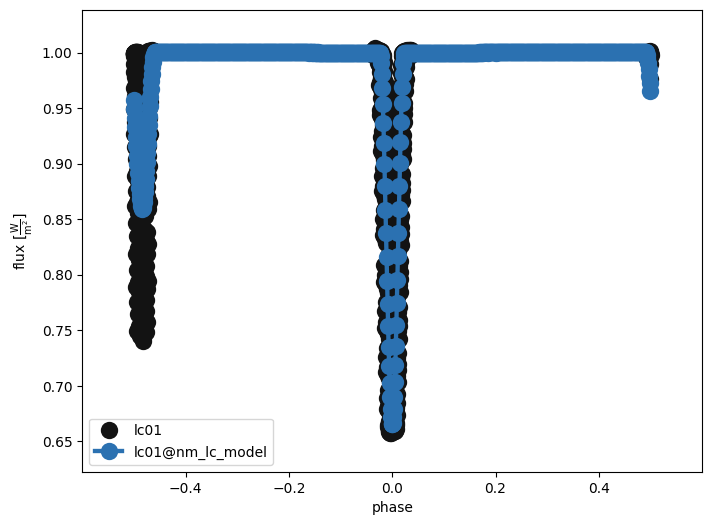

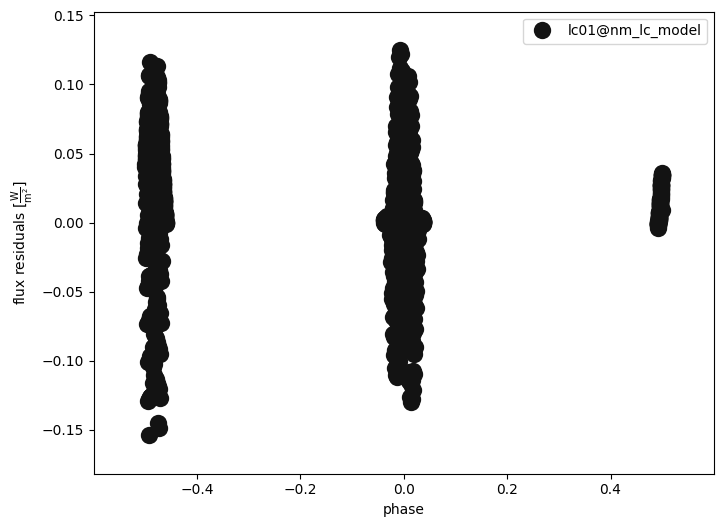

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [19]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

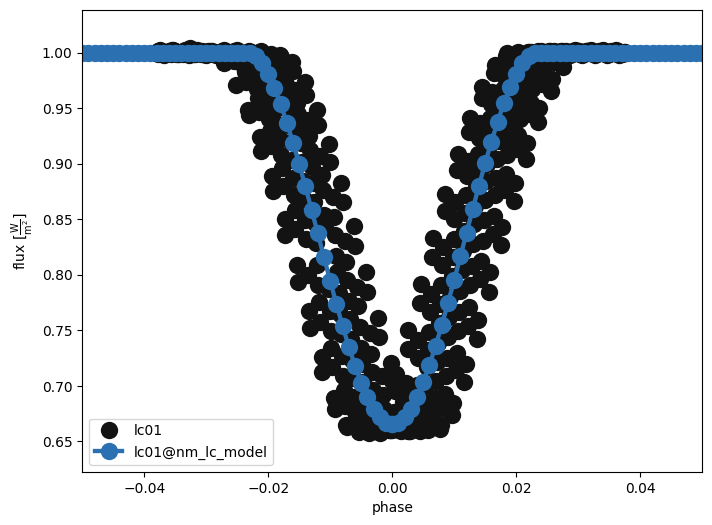

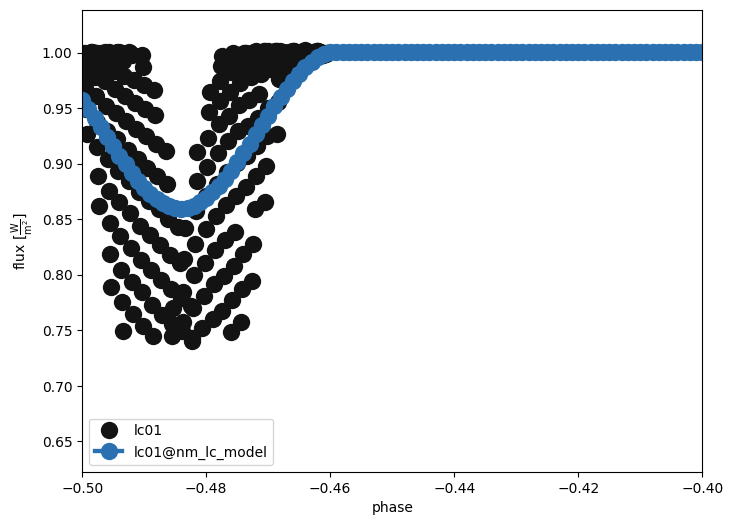

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [22]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.05, 0.05))
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

In [23]:
b.save('after_nm_lc.bundle')

'after_nm_lc.bundle'

### Fitting with Differential Evolution

In [2]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_nm_lc.bundle')

In [3]:
b.disable_dataset('lc01')
b.enable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, binary, primary>

In [4]:
b.add_solver('optimizer.differential_evolution', solver = 'de_solver')

<ParameterSet: 15 parameters | qualifiers: fit_parameters, use_server, tol, compute, bounds, maxiter, recombination, comments, popsize, bounds_sigma, strategy, atol, bounds_combine, expose_lnprobabilities, polish>

In [5]:
b.set_value('maxiter@de_solver', value = 100)

In [6]:
fit_params = ['vgamma@system', 'q@binary', 'asini@binary', 'ecc@binary', 'per0@binary']
b.set_value('fit_parameters@de_solver', value = fit_params)

In [7]:
b.add_distribution('vgamma@system', phoebe.uniform(0, 30), distribution='de_bounds')
b.add_distribution('q@binary', phoebe.uniform(0.5, 1.5), distribution='de_bounds')
b.add_distribution('asini@binary', phoebe.uniform(0, 30), distribution='de_bounds')
b.add_distribution('ecc@binary', phoebe.uniform(0, 0.4), distribution='de_bounds')
b.add_distribution('per0@binary', phoebe.uniform(0, 300), distribution='de_bounds')

<ParameterSet: 1 parameters>

In [8]:
b.set_value('bounds@de_solver', ['de_bounds',])

In [11]:
b.run_solver('de_solver', solution = 'de_rv_sol')

 50%|█████     | 50/100 [43:15<43:15, 51.90s/it]  


<ParameterSet: 11 parameters | qualifiers: message, fitted_units, bounds, fitted_twigs, adopt_parameters, niter, adopt_distributions, comments, fitted_values, adopt_values, success>

In [15]:
print(b.adopt_solution('de_rv_sol', trial_run = True))

ParameterSet: 5 parameters
                    vgamma@system: 15.20671567168341 km / s
         q@binary@orbit@component: 0.8834647454093508
     asini@binary@orbit@component: 26.38853085606493 solRad
       ecc@binary@orbit@component: 0.3049447686675337
      per0@binary@orbit@component: 274.3503550610976 deg


In [12]:
b.adopt_solution('de_rv_sol')

<ParameterSet: 25 parameters | contexts: component, dataset, system>

In [13]:
b.run_compute(compute = 'physics_comp', solution = 'de_rv_sol', sample_num = 1, model = 'de_rv_model')

Fri, 02 Aug 2024 17:27 BUNDLE       WARNING applying passed solution (de_rv_sol) to sample_from
Fri, 02 Aug 2024 17:27 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:10<00:00, 10.75s/it]


<ParameterSet: 10 parameters | components: secondary, primary>

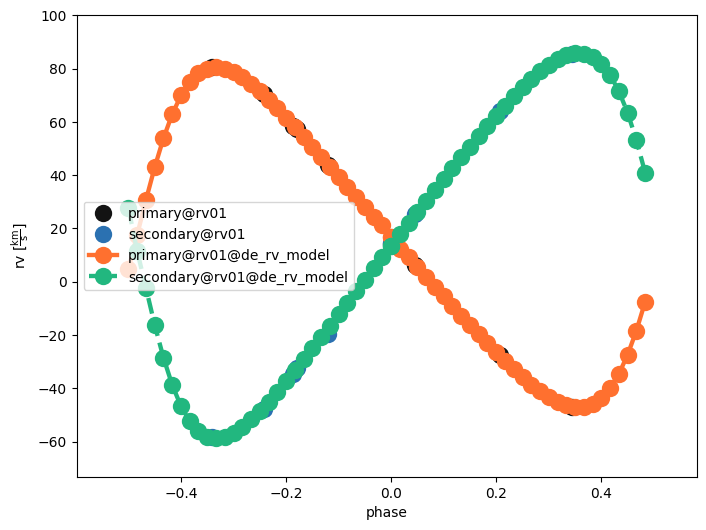

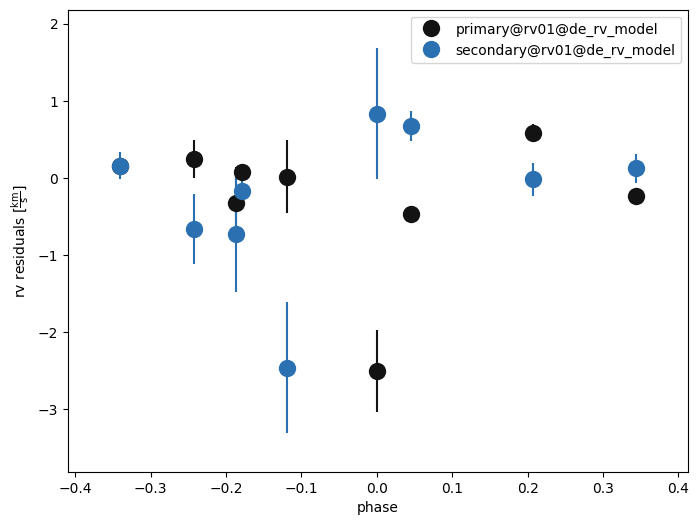

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [14]:
b.plot(model = 'de_rv_model', kind = 'rv', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'de_rv_model', kind = 'rv', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [28]:
b.enable_dataset('lc01')

<ParameterSet: 18 parameters | components: secondary, binary, primary>

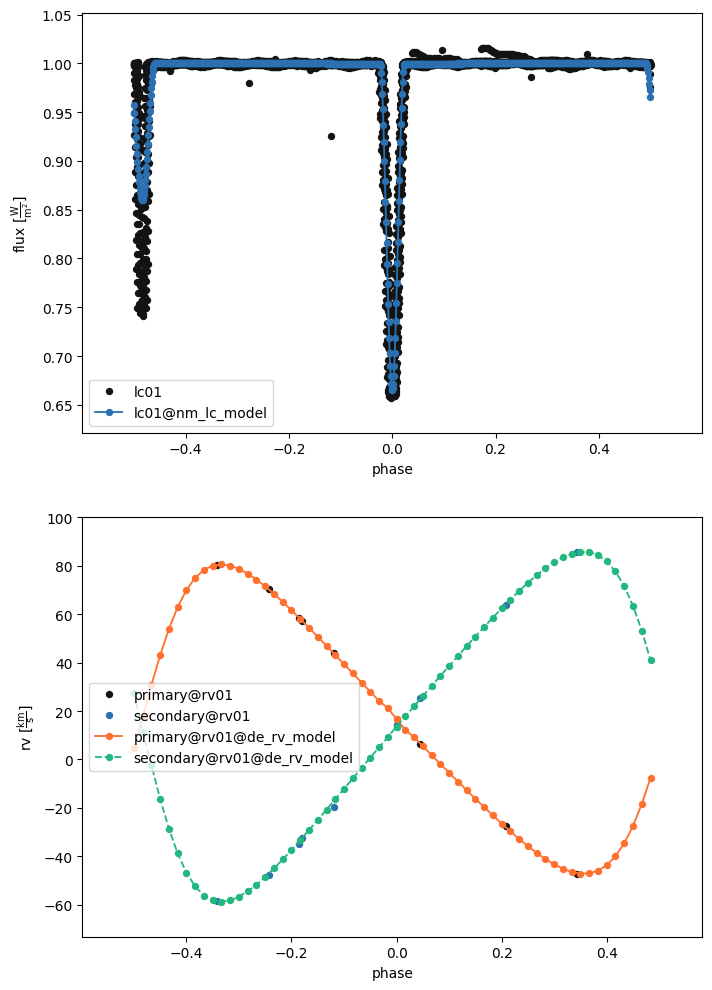

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [34]:
b.plot(model = ['nm_lc_model', 'de_rv_model'], x = 'phases', s = 0.006, show = True, legend = True, marker = 'o')

In [35]:
b.set_value('mask_enabled@lc01', False)

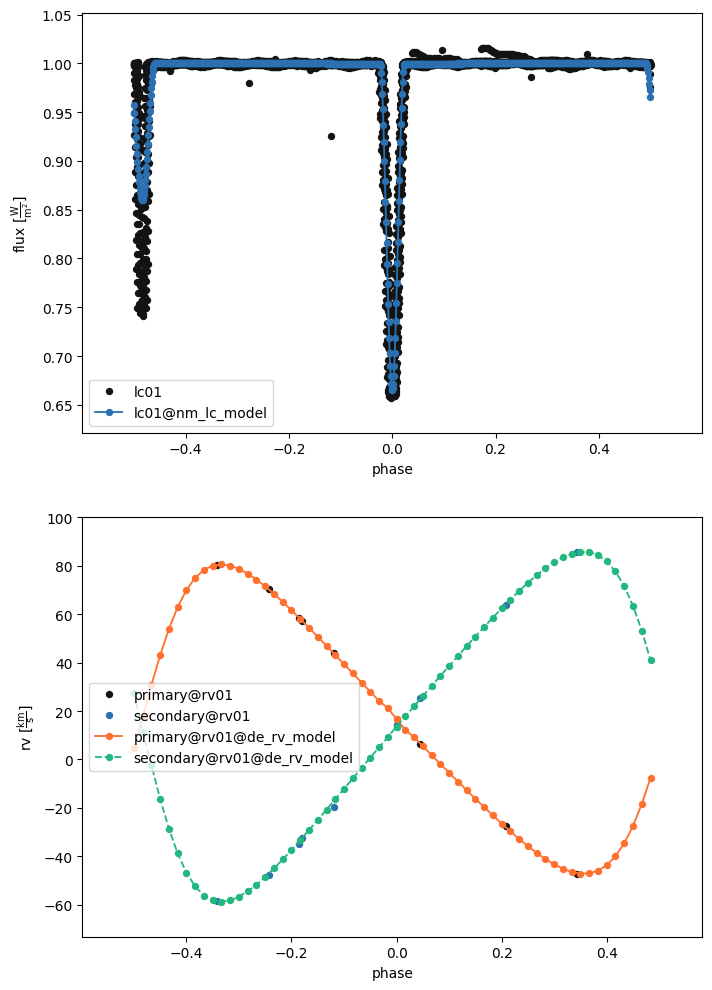

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [36]:
b.plot(model = ['nm_lc_model', 'de_rv_model'], x = 'phases', s = 0.006, show = True, legend = True, marker = 'o')

In [37]:
b.save('after_de_rv.bundle')

'after_de_rv.bundle'